In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = os.path.join('My_Datasets')

actions = np.array(["standby",
                    "maaf",
                    "tolong",
                    "nama",
                    "siapa",
                    "rumah",
                    "delete",
                    "translate",
                    "dimana",
                    "berapa",
                    "ini",
                    "terimakasih",
                    "kamu",
                    "saya",
                    ])

sequence_length = 30

In [3]:
grouped_sequences = {action: [] for action in actions}
ori_grouped_sequences = {action: [] for action in actions}

sequences = []


for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            try:
                res = np.load(os.path.join(DATA_PATH, action, str(
                    sequence), "{}-norm.npy".format(frame_num)))
                window.append(res)
            except FileNotFoundError:
                continue  # Skip this frame if the file does not exist

        # Append the sequence to the correct action in grouped_sequences
        if window:  # Ensure the window is not empty
            grouped_sequences[action].append(window)


for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            try:
                res = np.load(os.path.join(DATA_PATH, action, str(
                    sequence), "{}.npy".format(frame_num)))
                window.append(res)
            except FileNotFoundError:
                continue  # Skip this frame if the file does not exist

        # Append the sequence to the correct action in grouped_sequences
        if window:  # Ensure the window is not empty
            ori_grouped_sequences[action].append(window)

In [11]:
action_of_interest = "ini"
sequences_for_action = grouped_sequences[action_of_interest]

print(f"Accessing sequences for action: {action_of_interest}")
for sequence_index, sequence in enumerate(sequences_for_action):
    print(f"Sequence {sequence_index + 1}:\n")
    print("\n")
    for frame_index, frame_coordinates in enumerate(sequence):
        print(f"  Frame {frame_index + 1}:\n{frame_coordinates}")
        print("\n")
    print(f"End Sequence {sequence_index + 1}\n\n")

Accessing sequences for action: ini
Sequence 1:


  Frame 1: [ 0.58845409  0.14648161 -0.32412817  0.13036183  0.71169898  1.10098026
 -0.58655381  1.05511193  0.74079592  2.00840925 -0.24911772  0.54696468
  0.75904436  2.28781983 -0.10805121  0.57706925  0.67270217  2.29760257
 -0.04885057  0.47937805  0.64945932  2.19985898 -0.07767437  0.45840375
  0.79565464  2.07419878  0.70838195  2.13408471  0.65122275  2.28681796
  0.61248554  2.42451389  0.58452575  2.53054301  0.74942597  2.43273611
  0.70221125  2.57794567  0.65481033  2.63518919  0.62075294  2.67134127
  0.78710719  2.44329939  0.73653717  2.58058375  0.68774553  2.63443455
  0.64705609  2.67577185  0.80305918  2.44195934  0.7566725   2.57247666
  0.70915127  2.62834042  0.66843938  2.67175802  0.80203083  2.43634729
  0.76182981  2.56218508  0.72149553  2.62368131  0.68607823  2.66536514
 -0.18393604  0.36372248 -0.06414548  0.36992915  0.04165454  0.45241581
  0.09335797  0.53656085  0.11330825  0.59917466  0.10372727  0

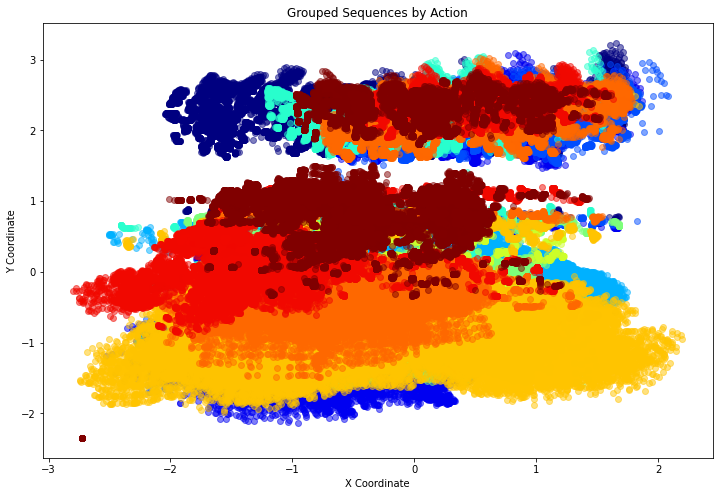

In [21]:
# Generate a list of colors, one for each action
colors = plt.cm.jet(np.linspace(0, 1, len(grouped_sequences)))

plt.figure(figsize=(12, 8))

for action_index, (action, sequences) in enumerate(grouped_sequences.items()):
    for sequence in sequences:
        # Initialize lists to store x and y coordinates for all frames in the sequence
        x_coords = []
        y_coords = []
        for frame in sequence:
            # Extract x and y coordinates from the frame
            # Frame format is [x1, y1, x2, y2, ...]
            x_coords.extend(frame[::2])  # Take every even index element
            y_coords.extend(frame[1::2])  # Take every odd index element

        # Plot the sequence
        plt.scatter(x_coords, y_coords, color=colors[action_index], alpha=0.5)

plt.title('Grouped Sequences by Action')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [17]:
import matplotlib.pyplot as plt
import numpy as np


def plot_action_sequences(action_name, grouped_sequences):
    """
    Plot all sequences for a given action name.

    Parameters:
    - action_name: The name of the action to plot.
    - grouped_sequences: A dictionary where keys are action names and values are lists of sequences.
      Each sequence is a list of frames, and each frame is a list/array of coordinates in the format [x1, y1, x2, y2, ...].
    """

    # Check if the action exists in the grouped_sequences
    if action_name not in grouped_sequences:
        print(
            f"Action '{action_name}' not found in the provided grouped sequences.")
        return

    # Generate a random color for plotting this action
    color = np.random.rand(3,)

    plt.figure(figsize=(10, 6))

    sequences = grouped_sequences[action_name]
    for sequence in sequences:
        x_coords = []
        y_coords = []
        for frame in sequence:
            x_coords.extend(frame[::2])  # Extracting x coordinates
            y_coords.extend(frame[1::2])  # Extracting y coordinates

        # Plot the current sequence
        plt.scatter(x_coords, y_coords, color=color, alpha=0.5)

    plt.title(f'Sequences for Action: {action_name}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

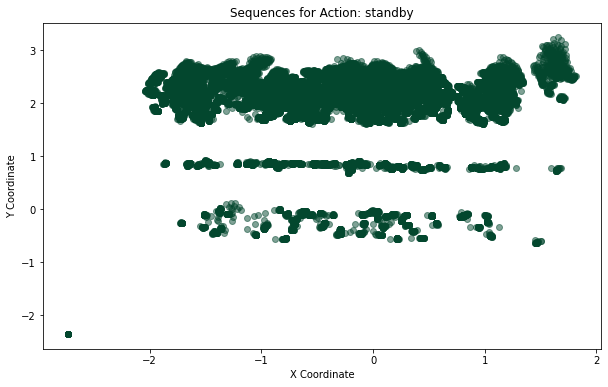

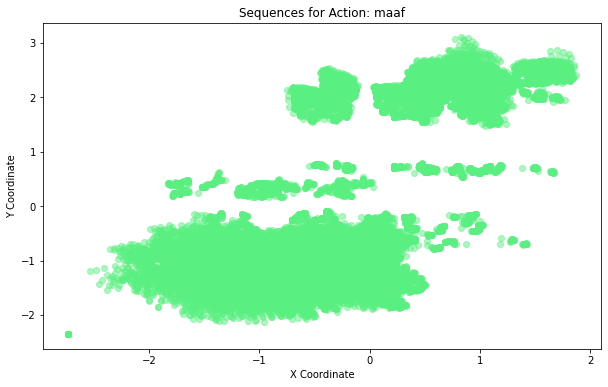

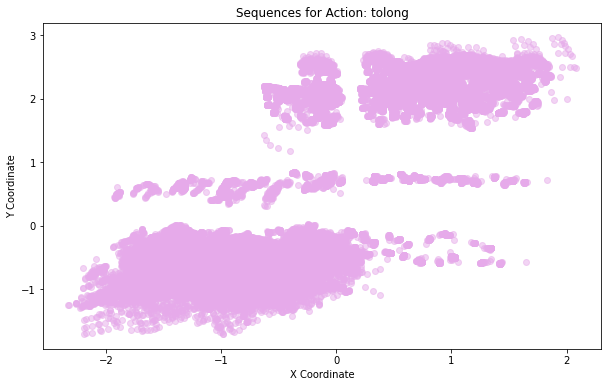

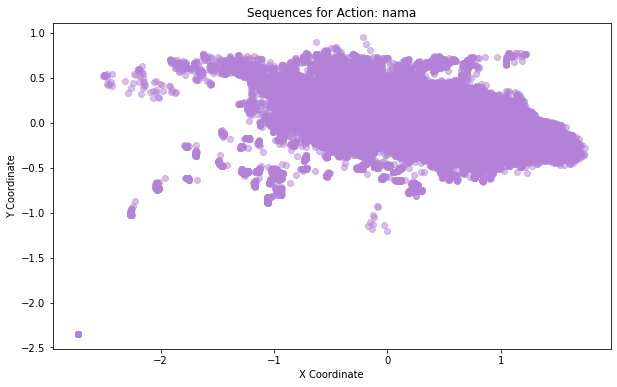

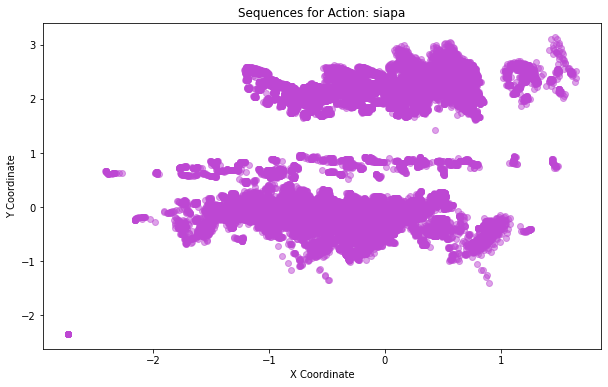

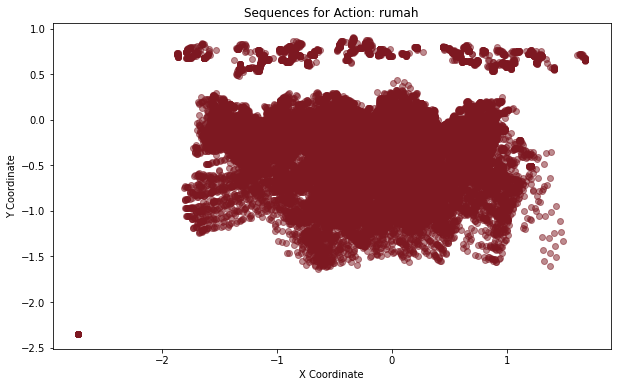

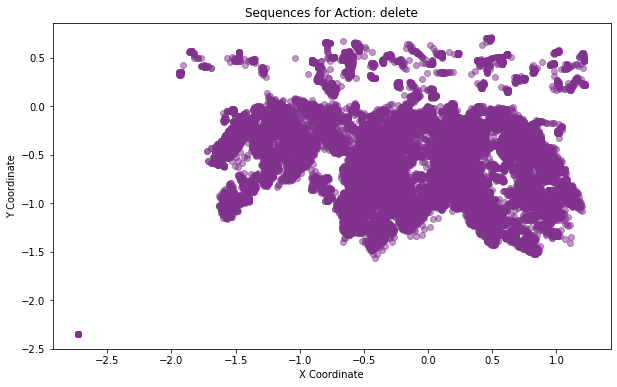

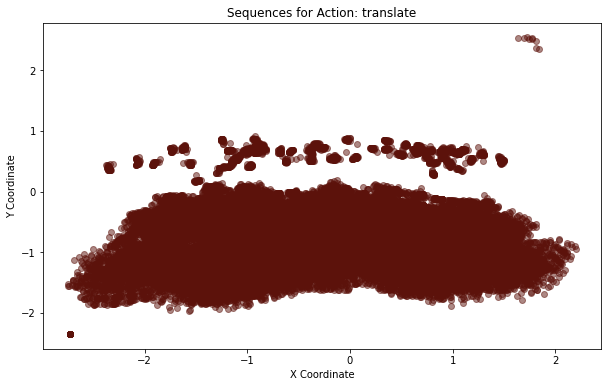

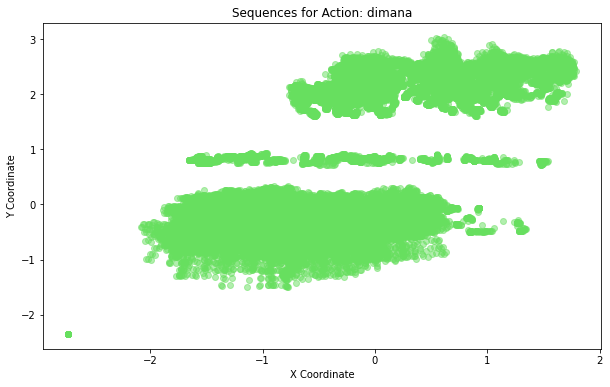

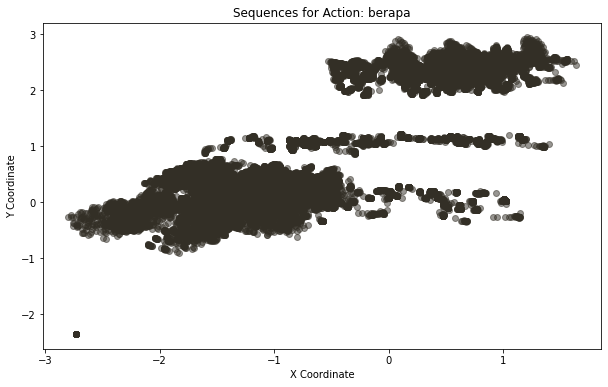

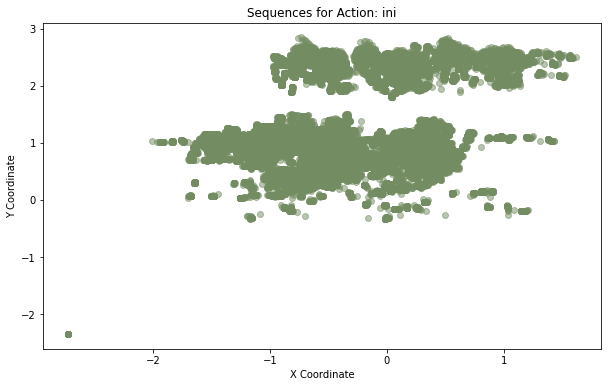

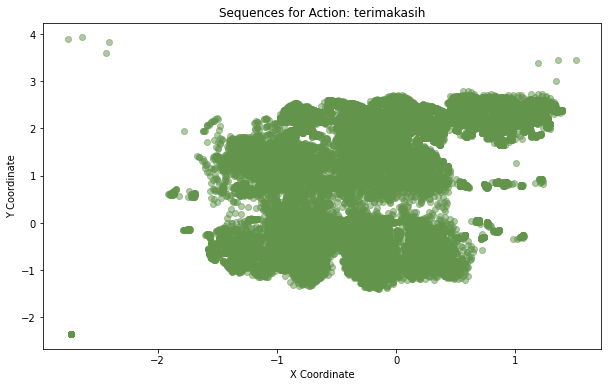

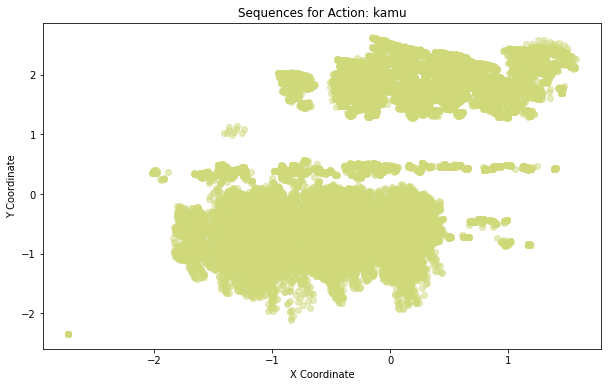

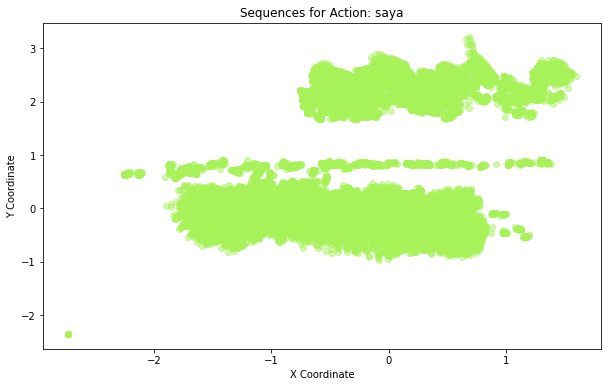

In [39]:
for action in actions:
    plot_action_sequences(action, grouped_sequences)

In [31]:
import matplotlib.pyplot as plt
import numpy as np


def compare_two_actions(action1_name, action2_name, grouped_sequences):
    """
    Compare two actions by plotting their sequences on the same graph with distinct colors.

    Parameters:
    - action1_name, action2_name: The names of the two actions to plot.
    - grouped_sequences: A dictionary where keys are action names and values are lists of sequences.
      Each sequence is a list of frames, and each frame is a list/array of coordinates in the format [x1, y1, x2, y2, ...].
    """

    # Define distinct colors for the two actions and update the dictionary to use specific action names
    action_colors = {action1_name: 'blue', action2_name: 'green'}

    plt.figure(figsize=(12, 8))

    # Initialize a flag to check if we have plotted for the legend
    plotted_for_legend = {action1_name: False, action2_name: False}

    for action_name in [action1_name, action2_name]:
        if action_name not in grouped_sequences:
            print(
                f"Action '{action_name}' not found in the provided grouped sequences.")
            continue

        sequences = grouped_sequences[action_name]
        color = action_colors[action_name]

        for sequence in sequences:
            x_coords = [frame[::2] for frame in sequence]
            y_coords = [frame[1::2] for frame in sequence]

            # Use label only for the first sequence of each action to avoid duplicate legend entries
            label = action_name if not plotted_for_legend[action_name] else None
            plt.scatter(np.array(x_coords), np.array(y_coords),
                        color=color, alpha=0.5, label=label)

            # Set flag to True after plotting the first sequence
            plotted_for_legend[action_name] = True

    plt.title(f'Comparison of Actions: {action1_name} vs {action2_name}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

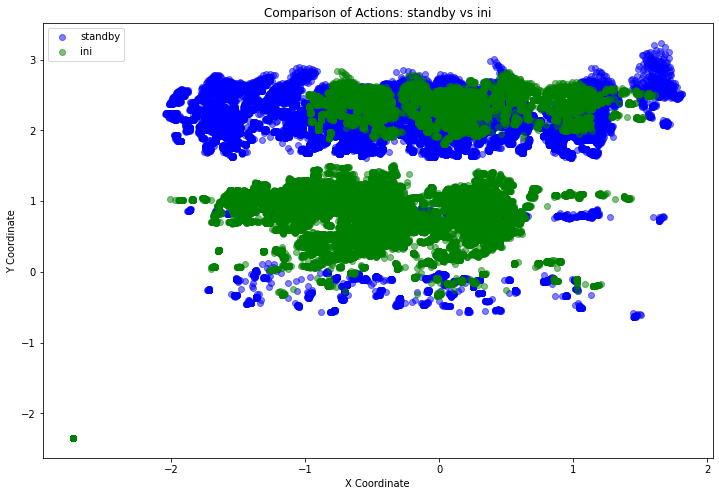

In [32]:
compare_two_actions('standby', 'ini', grouped_sequences)

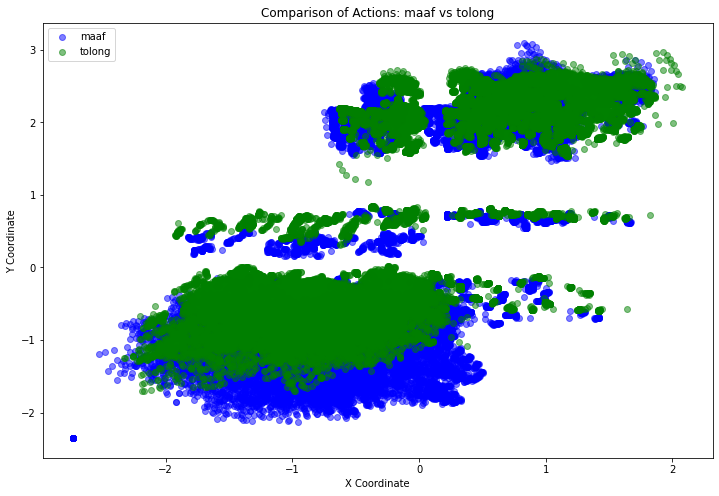

In [33]:
compare_two_actions('maaf', 'tolong', grouped_sequences)

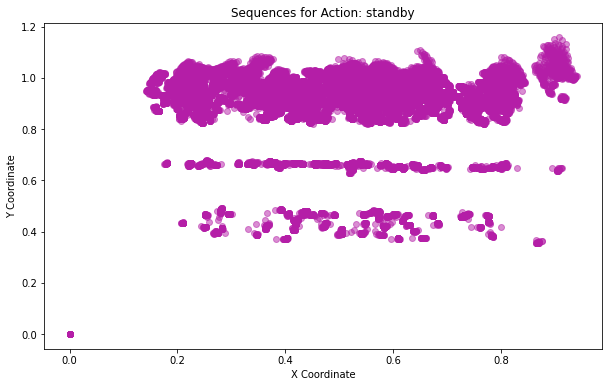

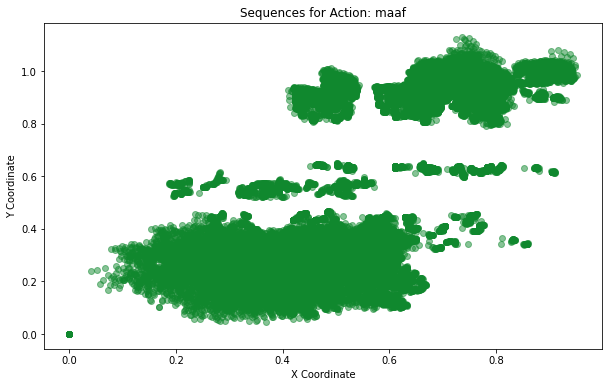

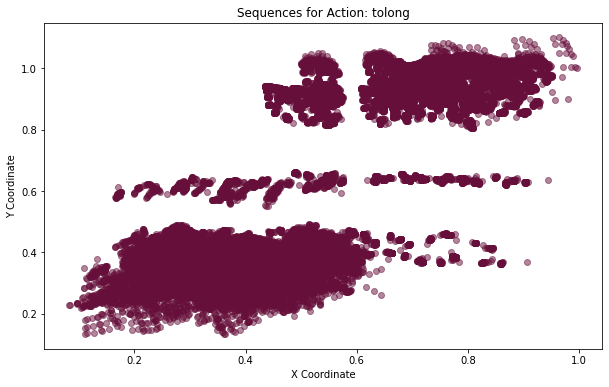

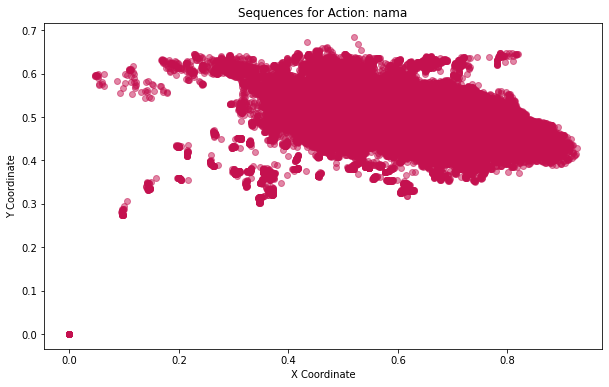

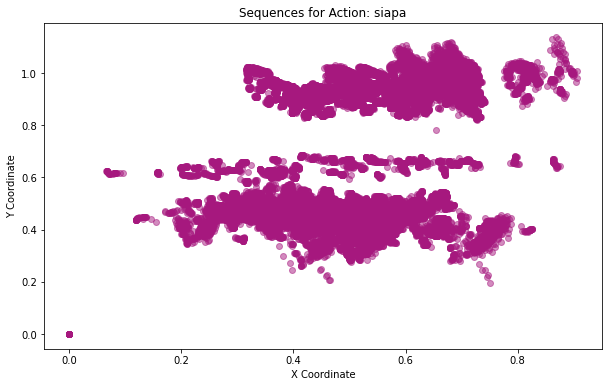

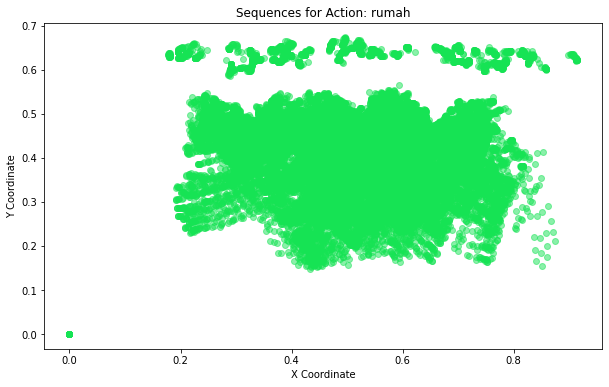

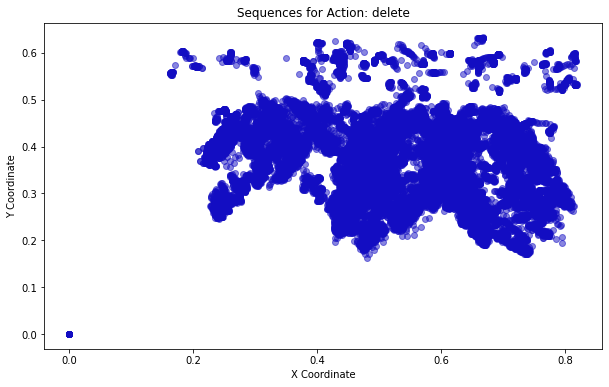

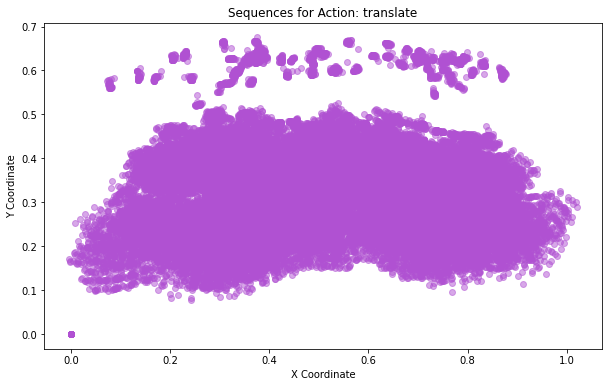

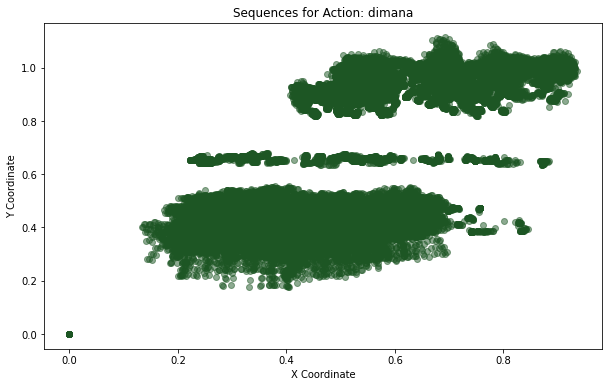

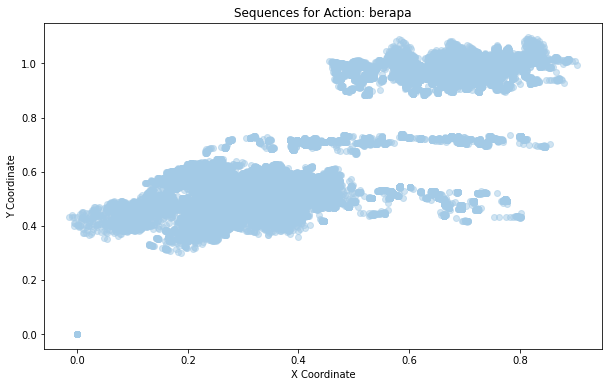

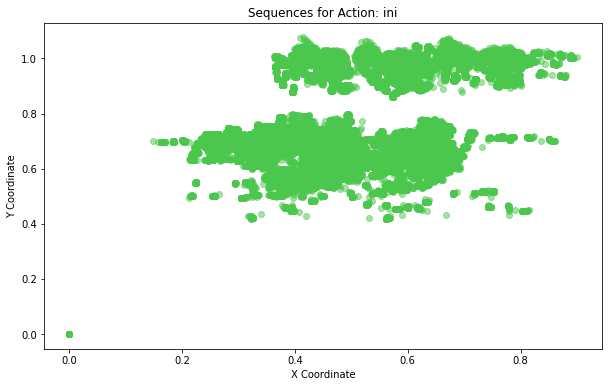

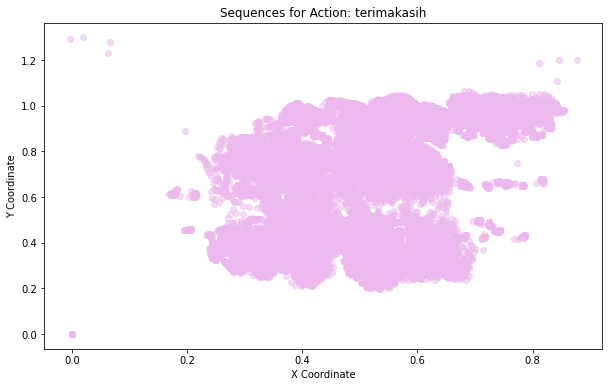

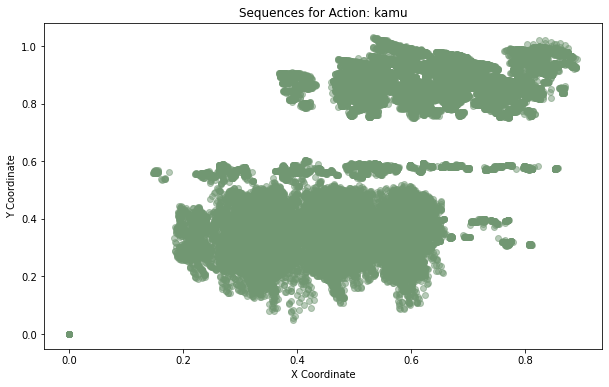

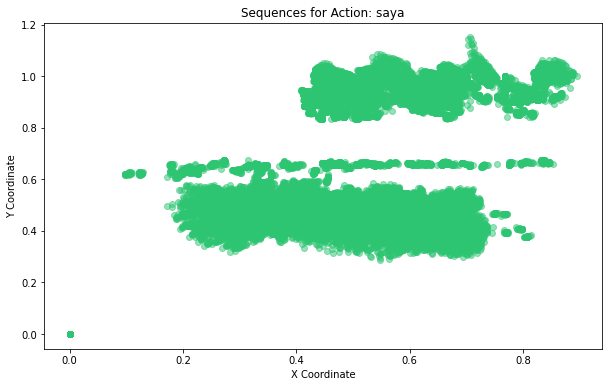

In [40]:
for action in actions:
    plot_action_sequences(action, ori_grouped_sequences)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

from scipy.stats import pearsonr
import numpy as np


def calculate_pearson_correlation(seq1, seq2, max_frame_length):
    # Pad each sequence to have the same number of frames and the same frame length
    seq1_padded = np.array([np.pad(frame, (0, max_frame_length - len(frame)),
                           'constant', constant_values=0) for frame in seq1])
    seq2_padded = np.array([np.pad(frame, (0, max_frame_length - len(frame)),
                           'constant', constant_values=0) for frame in seq2])

    # Ensure that both sequences have the same number of frames
    max_frames = max(len(seq1_padded), len(seq2_padded))
    seq1_padded = np.pad(seq1_padded, [
                         (0, max_frames - len(seq1_padded)), (0, 0)], 'constant', constant_values=0)
    seq2_padded = np.pad(seq2_padded, [
                         (0, max_frames - len(seq2_padded)), (0, 0)], 'constant', constant_values=0)

    # Calculate the correlation for each frame, then take the mean
    correlations = [pearsonr(seq1_padded[i], seq2_padded[i])[0]
                    for i in range(max_frames)]
    # Clean NaN values which can occur if there is no variation in a frame
    correlations = [corr for corr in correlations if not np.isnan(corr)]
    average_correlation = np.mean(correlations) if correlations else 0
    return average_correlation


def calculate_cosine_similarity(seq1, seq2):
    # Flatten the sequences
    seq1_flat = np.array(seq1).reshape(-1)
    seq2_flat = np.array(seq2).reshape(-1)

    # Ensure both sequences are the same length
    min_length = min(len(seq1_flat), len(seq2_flat))
    seq1_flat = seq1_flat[:min_length]
    seq2_flat = seq2_flat[:min_length]

    # Reshape for cosine_similarity function
    seq1_flat = seq1_flat.reshape(1, -1)
    seq2_flat = seq2_flat.reshape(1, -1)

    # Calculate cosine similarity
    similarity = cosine_similarity(seq1_flat, seq2_flat)[0][0]
    return similarity

In [24]:
def find_detailed_similar_actions(grouped_sequences):
    action_similarities = {}
    actions = list(grouped_sequences.keys())

    for action1 in actions:
        action_similarities[action1] = {}

        for action2 in actions:
            if action1 == action2:
                continue  # Skip comparison with itself

            # Ensure both actions have the same number of sequences
            num_sequences = min(len(grouped_sequences[action1]), len(
                grouped_sequences[action2]))
            if num_sequences == 0:
                action_similarities[action1][action2] = None
                continue  # Skip if there are no sequences to compare

            total_similarity = 0

            # Compare corresponding sequences
            for i in range(num_sequences):
                seq1 = grouped_sequences[action1][i]
                seq2 = grouped_sequences[action2][i]
                similarity = calculate_cosine_similarity(seq1, seq2)
                total_similarity += similarity

            average_similarity = total_similarity / num_sequences

            # Store the similarity score
            action_similarities[action1][action2] = average_similarity

    return action_similarities


def print_similarity_scores(action_similarities):
    for action1, similarities in action_similarities.items():
        for action2, similarity in similarities.items():
            if similarity is not None:
                print(
                    f"Similarity between {action1} and {action2} = {similarity:.2f}")
            else:
                print(
                    f"Similarity between {action1} and {action2} could not be calculated due to lack of data.")


# def find_most_similar_actions_by_pearson(grouped_sequences):
#     most_similar = {}
#     actions = list(grouped_sequences.keys())

#     # Find the maximum frame length across all sequences for padding
#     max_frame_length = max(max(len(
#         item) for sequence in grouped_sequences[action] for item in sequence) for action in actions)

#     for action1 in actions:
#         highest_correlation = -2  # Start lower than the minimum possible correlation
#         most_similar_action = None

#         for action2 in actions:
#             if action1 == action2:
#                 continue

#             total_correlation = 0
#             count = 0

#             for seq1 in grouped_sequences[action1]:
#                 for seq2 in grouped_sequences[action2]:
#                     correlation = calculate_pearson_correlation(
#                         seq1, seq2, max_frame_length)
#                     total_correlation += correlation
#                     count += 1

#             average_correlation = total_correlation / count if count != 0 else 0

#             if average_correlation > highest_correlation:
#                 highest_correlation = average_correlation
#                 most_similar_action = action2

#         most_similar[action1] = (most_similar_action, highest_correlation)

#     return most_similar

In [25]:
action_similarities = find_detailed_similar_actions(grouped_sequences)
print(action_similarities)

{'standby': {'maaf': 0.154217667978725, 'tolong': 0.4466941166945865, 'nama': 0.1021338099289965, 'siapa': 0.36320500924998295, 'rumah': -0.31027447066368824, 'delete': -0.3660990646034042, 'translate': -0.3256796428606697, 'dimana': 0.38322495244557236, 'berapa': 0.2591176937477662, 'ini': 0.5199159973378, 'terimakasih': 0.4763311789706466, 'kamu': 0.2595883007315475, 'saya': 0.4114192412619623}, 'maaf': {'standby': 0.154217667978725, 'tolong': -0.2889062845503797, 'nama': 0.020822274003972078, 'siapa': 0.28687526276401537, 'rumah': 0.027252668777617055, 'delete': -0.23069740586901027, 'translate': -0.17906651295963094, 'dimana': 0.2872654138881906, 'berapa': 0.004858139820983661, 'ini': 0.2879236464616779, 'terimakasih': -0.16533144530839503, 'kamu': 0.8366854827866566, 'saya': 0.29647593732410676}, 'tolong': {'standby': 0.4466941166945865, 'maaf': -0.2889062845503797, 'nama': 0.12197473276528431, 'siapa': 0.30694697779420116, 'rumah': -0.3436402738939123, 'delete': -0.13537460862763

In [ ]:
# most_similar_actions = find_most_similar_actions_by_pearson(grouped_sequences)

# for action, (similar_action, similarity) in most_similar_actions.items():
#     print(
#         f"The most similar action to '{action}' is '{similar_action}' with a similarity score of {similarity:.2f}")